In [1]:
from wrangle import mother_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df, train, validate, test = mother_function()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361586 entries, 103 to 495432
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   361586 non-null  int64         
 1   open_date                 361586 non-null  datetime64[ns]
 2   due_date                  361586 non-null  datetime64[ns]
 3   closed_date               361586 non-null  datetime64[ns]
 4   is_late                   361586 non-null  object        
 5   dept                      361586 non-null  object        
 6   call_reason               361586 non-null  object        
 7   case_type                 361586 non-null  object        
 8   case_status               361586 non-null  object        
 9   source_id                 361586 non-null  object        
 10  address                   361586 non-null  object        
 11  council_district          361586 non-null  int64         
 12  

In [4]:
481205-431696

49509

In [5]:
49509/481205

0.10288546461487308

In [6]:
df.council_district.isna().sum()

0

In [7]:
train.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,zipcode
76795,1016236680,2020-06-09,2020-08-12,2020-06-09,NO,Development Services,code,Graffiti (Private Property),Closed,311 Mobile App,"1528 N ZARZAMORA ST, SAN ANTONIO, 78207",1,2119731.0,13709207.0,0.0,64,64.0,Early Response,78207
155648,1016329957,2020-08-05,2020-08-12,2020-08-05,NO,Solid Waste Management,waste,Carts(Cart Exchange),Closed,Web Portal,"8913 GOLDEN BROOK, SAN ANTONIO, 78250",6,2074728.0,13726943.0,0.0,7,7.0,Early Response,78250
437003,1016793006,2021-04-07,2021-04-12,2021-04-10,NO,Animal Care Services,field,Animals(Aggressive Non-Critical),Closed,Web Portal,"9334 LANDS POINT, SAN ANTONIO, 78250",6,2071085.0,13735435.0,3.0,5,2.0,Early Response,78250
109938,1016270045,2020-07-02,2020-07-10,2020-07-10,YES,Solid Waste Management,waste,Carts(Cart Exchange),Closed,Web Portal,"1651 W HUISACHE AVE, SAN ANTONIO, 78201",1,2120209.0,13714120.0,8.0,8,0.0,On Time Response,78201
348845,1016652937,2021-01-25,2021-02-01,2021-01-27,NO,Solid Waste Management,waste,Out of Cycle(Leaves No Fee),Closed,Web Portal,"546 MARY ST, SAN ANTONIO, 78214",5,2130910.0,13685039.0,2.0,7,5.0,Early Response,78214


5. Does category/department affect response time?

Text(0.5, 1, 'Evaluating number of days early or late per call type')

<Figure size 1440x720 with 0 Axes>

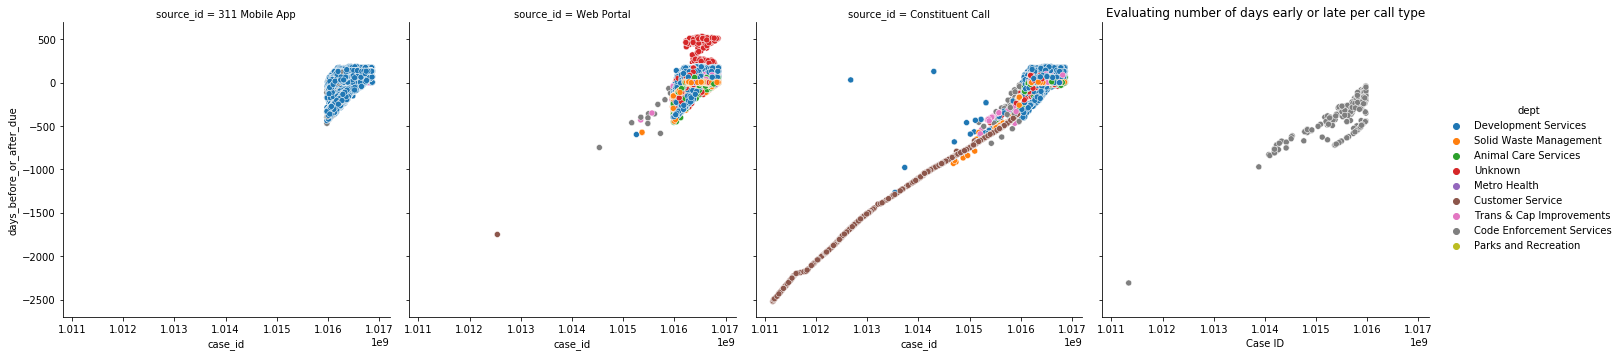

In [8]:
plt.figure(figsize=(20, 10))


sns.relplot(x='case_id', y='days_before_or_after_due', col= 'source_id', hue='dept', data=train)
plt.xlabel("Case ID")
plt.ylabel("Days early or late")
plt.title('Evaluating number of days early or late per call type')

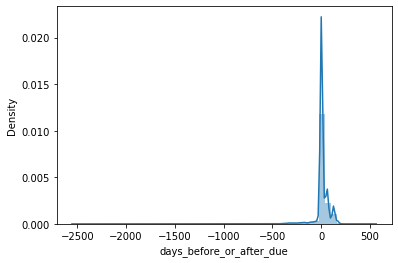

In [9]:
sns.distplot(train.days_before_or_after_due)

In [10]:
train.columns

Index(['case_id', 'open_date', 'due_date', 'closed_date', 'is_late', 'dept',
       'call_reason', 'case_type', 'case_status', 'source_id', 'address',
       'council_district', 'longitude', 'latitude', 'days_open',
       'resolution_days_due', 'days_before_or_after_due', 'level_of_delay',
       'zipcode'],
      dtype='object')

6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)

In [11]:
# Statistical Tests
import scipy.stats as stats

#### Hypothesis Testing #1 (ANOVA)

$H_0$: There is no difference in days before or after due date between the districts.

$H_a$: There is a significant difference in days before or after due date between the districts.

alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

In [12]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
null_hypothesis = 'there is no difference in days before or after due date between the districts.'

In [13]:
F, p = stats.f_oneway( 
train.days_before_or_after_due[train.council_district== 0],
train.days_before_or_after_due[train.council_district== 1],
train.days_before_or_after_due[train.council_district== 2],
train.days_before_or_after_due[train.council_district== 3],
train.days_before_or_after_due[train.council_district== 4],
train.days_before_or_after_due[train.council_district== 5],
train.days_before_or_after_due[train.council_district== 6], 
train.days_before_or_after_due[train.council_district== 7], 
train.days_before_or_after_due[train.council_district== 8], 
train.days_before_or_after_due[train.council_district== 9],
train.days_before_or_after_due[train.council_district== 10]
)
F, p

(25.341554216541414, 1.1184362569251931e-48)

In [14]:

if p > α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We reject the null hypothesis that there is no difference in days before or after due date between the districts.


#### Hypothesis Testing #1 (Chi $^2$)

$H_0$: There is no difference in if a case resolution is late between the districts.

$H_a$: There is a difference if a case resolution is late date between the districts.

alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

In [17]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
null_hypothesis = 'there is no difference in if a case resoution is late between the districts.'

In [18]:
contingency_table = pd.crosstab(train.council_district, train.is_late)
contingency_table

is_late,NO,YES
council_district,,
0,728,213
1,22608,3206
2,21313,5149
3,21654,4347
4,16690,2932
5,24506,3665
6,14833,2430
7,16069,2684
8,9777,1467


In [19]:
test_results = stats.chi2_contingency(contingency_table)
test_results

(999.2766414704997,
 2.677502567692861e-208,
 10,
 array([[  804.05131194,   136.94868806],
        [22057.15256782,  3756.84743218],
        [22610.84571355,  3851.15428645],
        [22216.93747253,  3784.06252747],
        [16766.30695304,  2855.69304696],
        [24071.12593895,  4099.87406105],
        [14750.62465245,  2512.37534755],
        [16023.77710174,  2729.22289826],
        [ 9607.60143614,  1636.39856386],
        [ 9694.75683871,  1651.24316129],
        [14414.82001314,  2455.17998686]]))

In [20]:
_, p, _, expected = test_results

In [21]:
if p > α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We reject the null hypothesis that there is no difference in if a case resoution is late between the districts.
